In [364]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gp
from matplotlib import rcParams

In [228]:
abnb_df = pd.read_csv('abnb_clean.gz', low_memory=False)
#pd.read_csv(item, skipinitialspace=True, usecols=copy_cols1, sep=',', low_memory = False)
abnb_df = abnb_df.drop(columns = 'Unnamed: 0')
#abnb_df['last_scraped'] = pd.to_datetime(abnb_df['last_scraped'], infer_datetime_format = True )
abnb_df['year'] = pd.to_datetime(abnb_df['last_scraped']).dt.to_period('Y')
abnb_df['availability_pct'] = abnb_df['availability_365']/365 *100
abnb_df["borough"] = abnb_df["borough"].astype("str")
abnb_df["borough"] = abnb_df["borough"].str.upper()


In [229]:
year_count = list(abnb_df.groupby(['year'])['id'].size())
years = ['2015','2016','2017','2018','2019','2020','2021','2022']

In [230]:
abnb_df.keys()

Index(['id', 'last_scraped', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'bedrooms', 'availability_365',
       'calculated_host_listings_count', 'geom', 'zipcode', 'borough', 'year',
       'availability_pct'],
      dtype='object')

In [231]:
def listing_clean(data):
    year_count = list(data.groupby(['year'])['id'].size())
    x=len(years)
    print('Number of NYC Airbnb Listings per Year:')
    for i in range(0,x):
        print('\t'+years[i] +':',year_count[i])
#    print('Number of features in dataset:', data.shape[1])
#    print('Avarage price is : $',round(data.price.mean()))
#    print('Number of hosts/suppliers: ', data.host_id.nunique())
#    print('Number of suburbs: ', data.neighbourhood.nunique())
    return

In [232]:
listing_clean(abnb_df)

Number of NYC Airbnb Listings per Year:
	2015: 33446
	2016: 39133
	2017: 46742
	2018: 48191
	2019: 49773
	2020: 36275
	2021: 36116
	2022: 45827


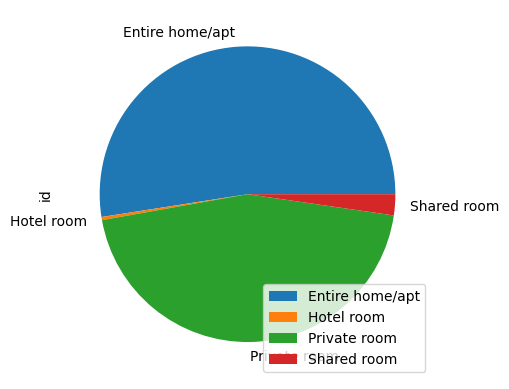

In [233]:
abnb_df.groupby(['room_type']).count().plot(kind='pie', y='id')
plt.legend(loc = 'lower right')
plt.show()

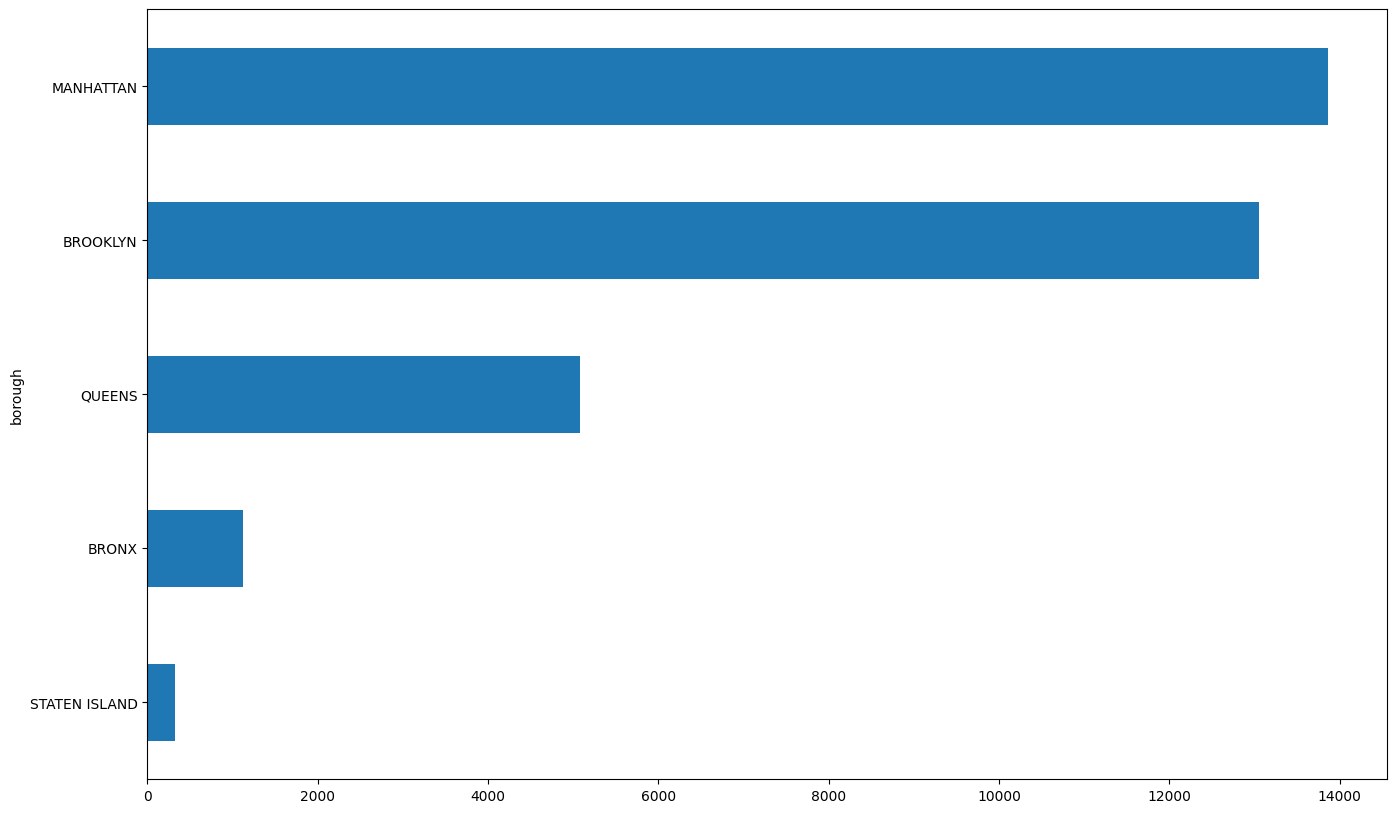

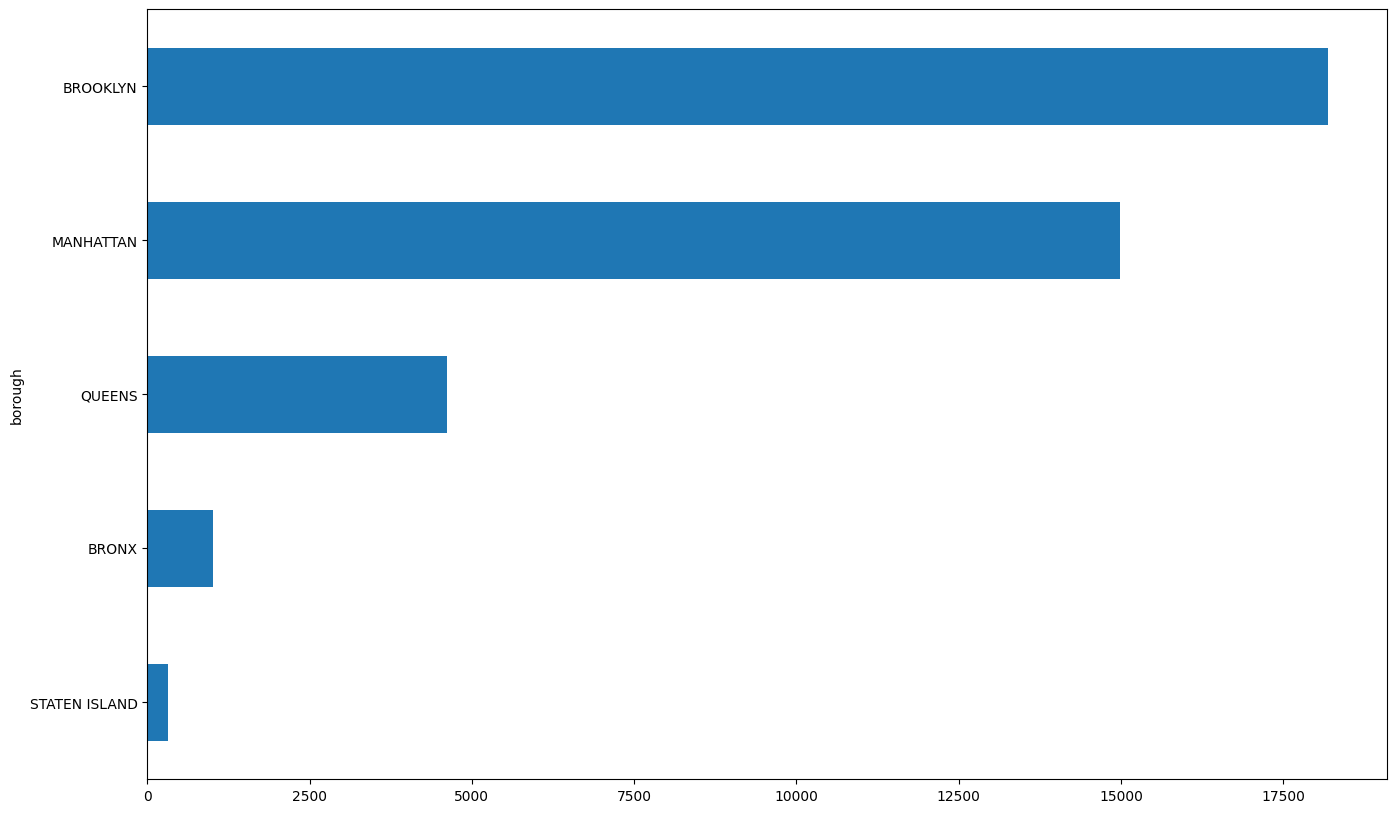

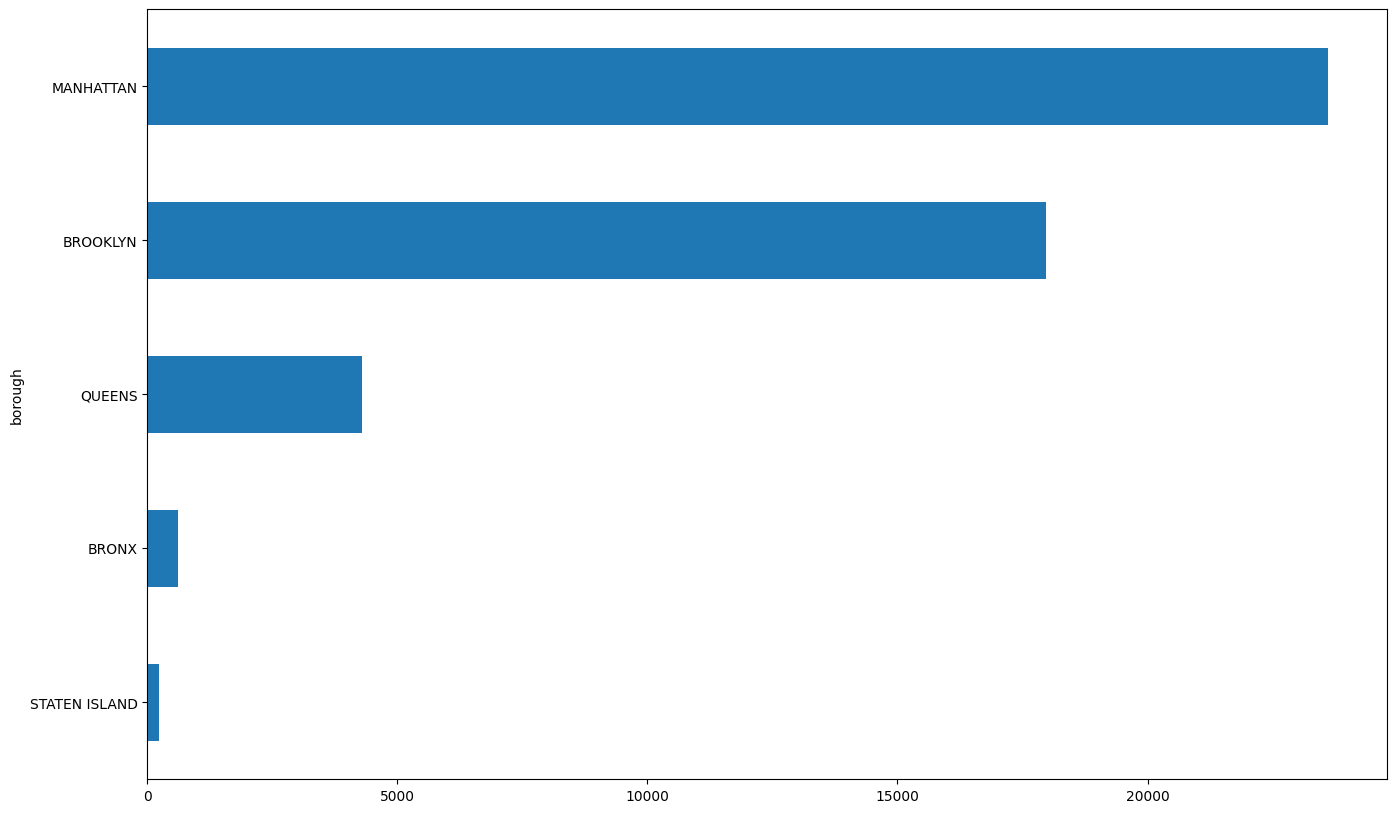

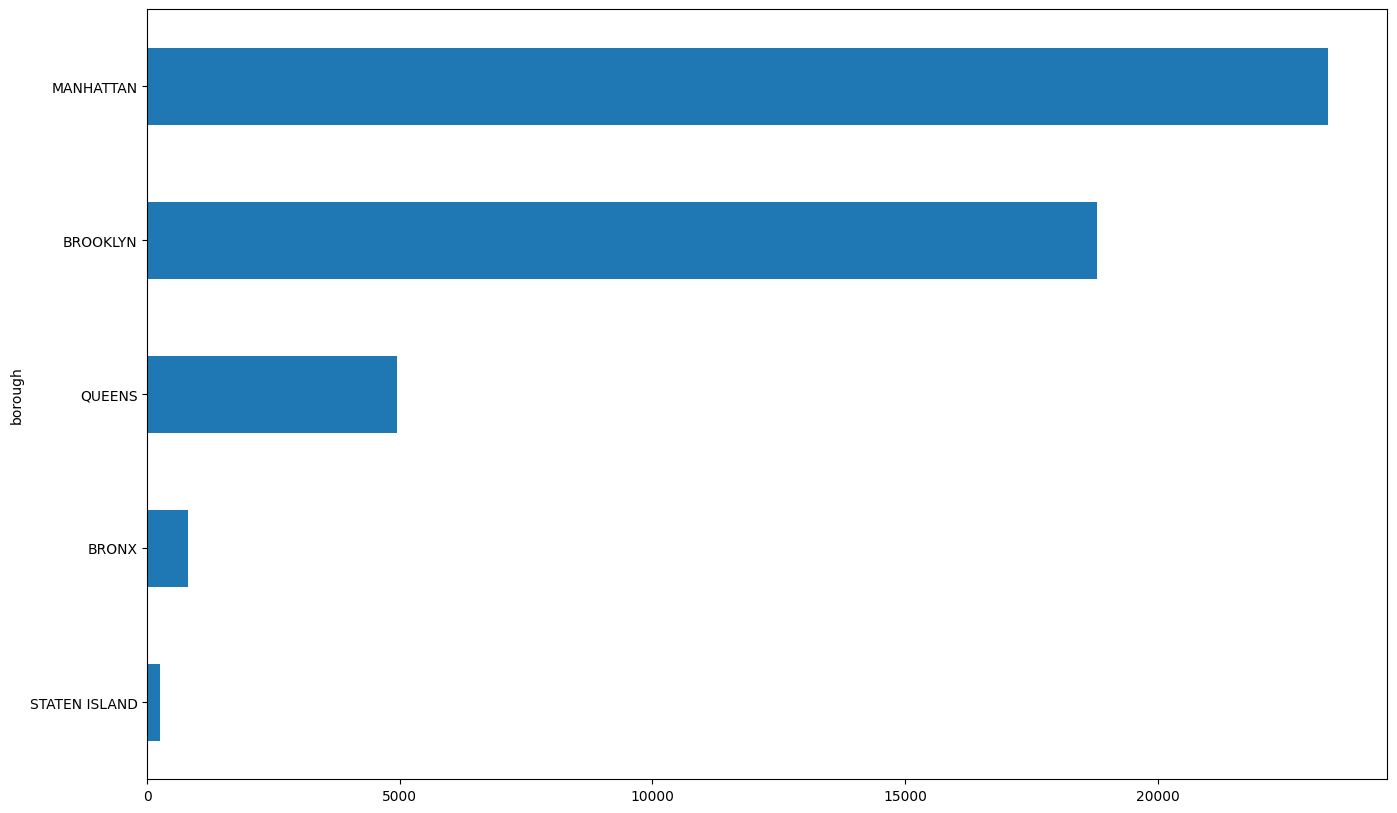

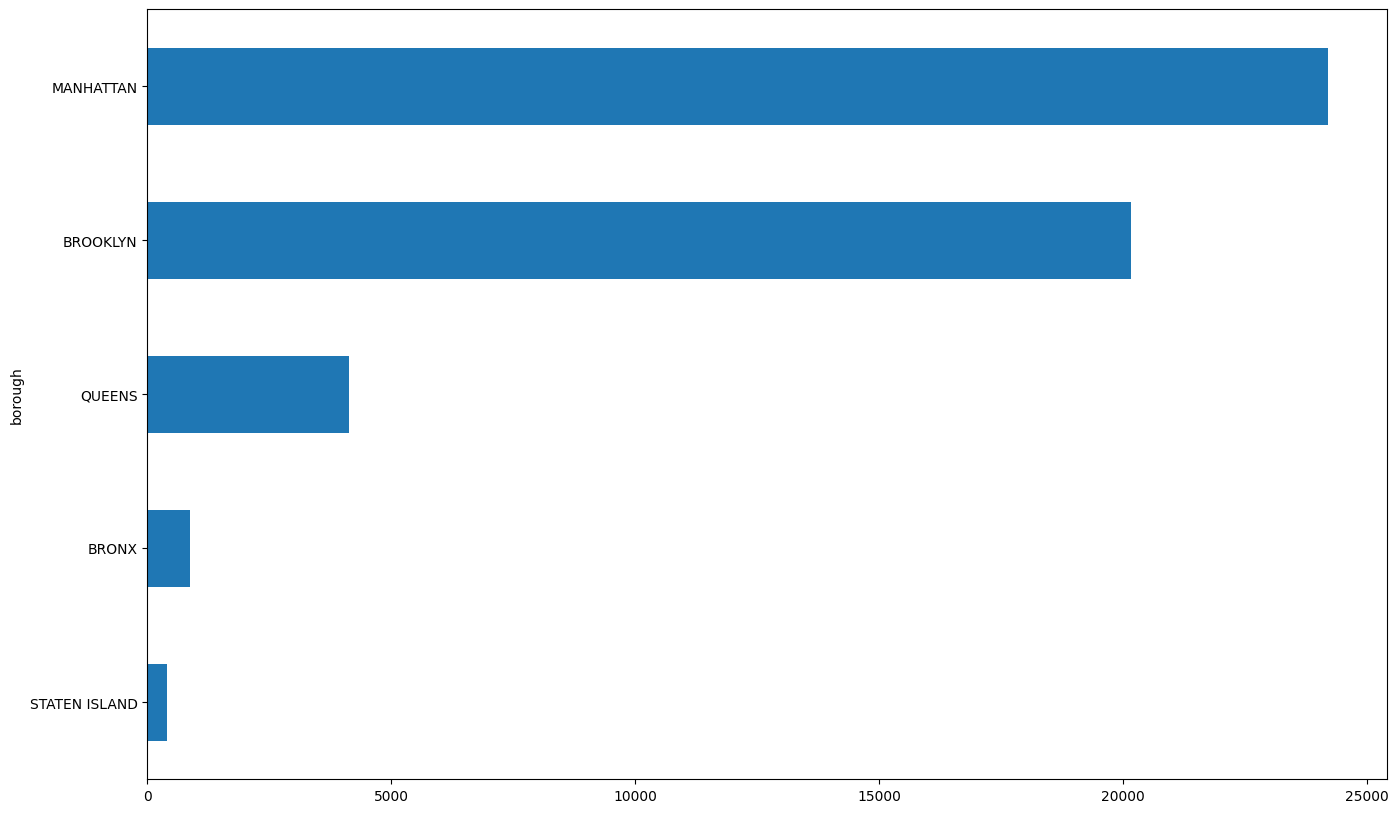

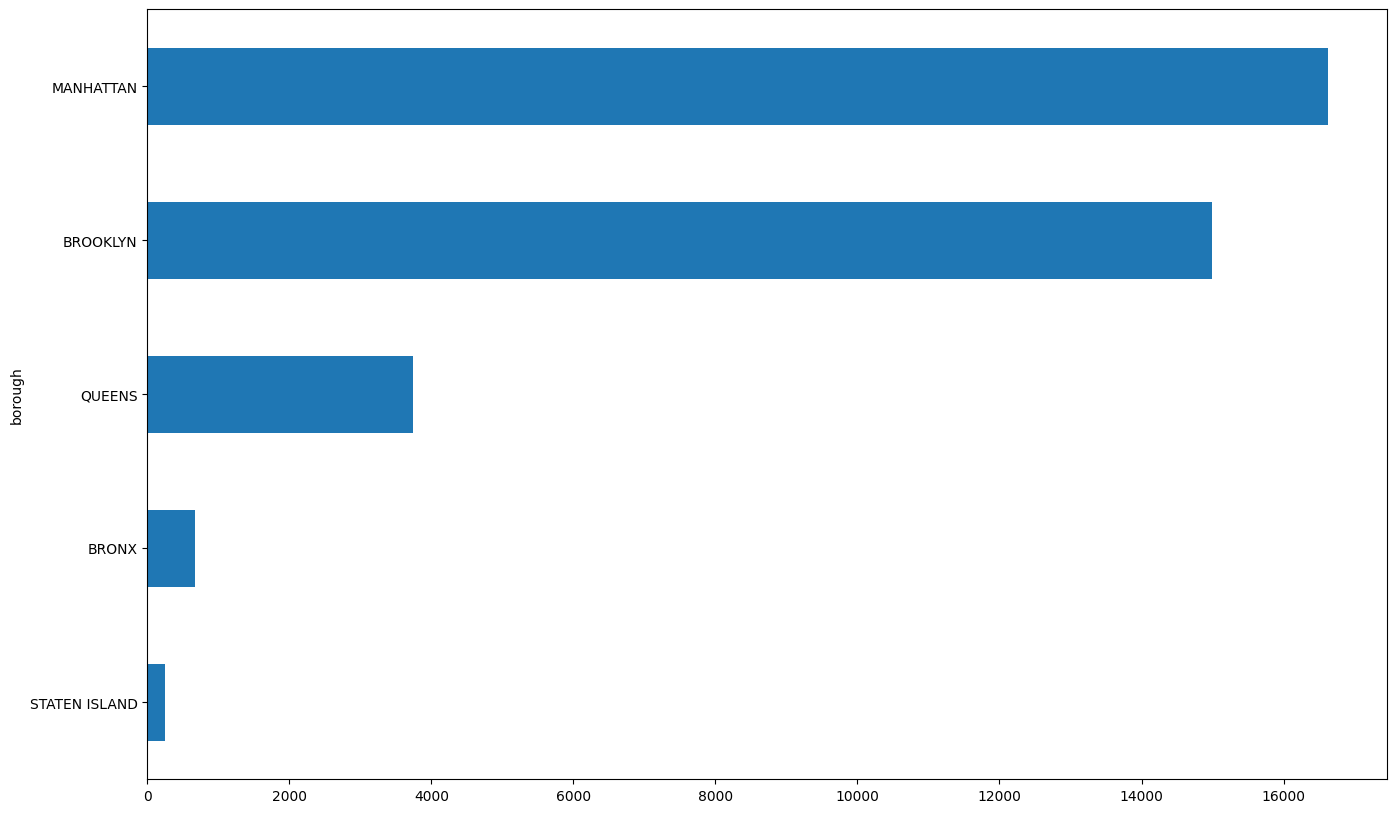

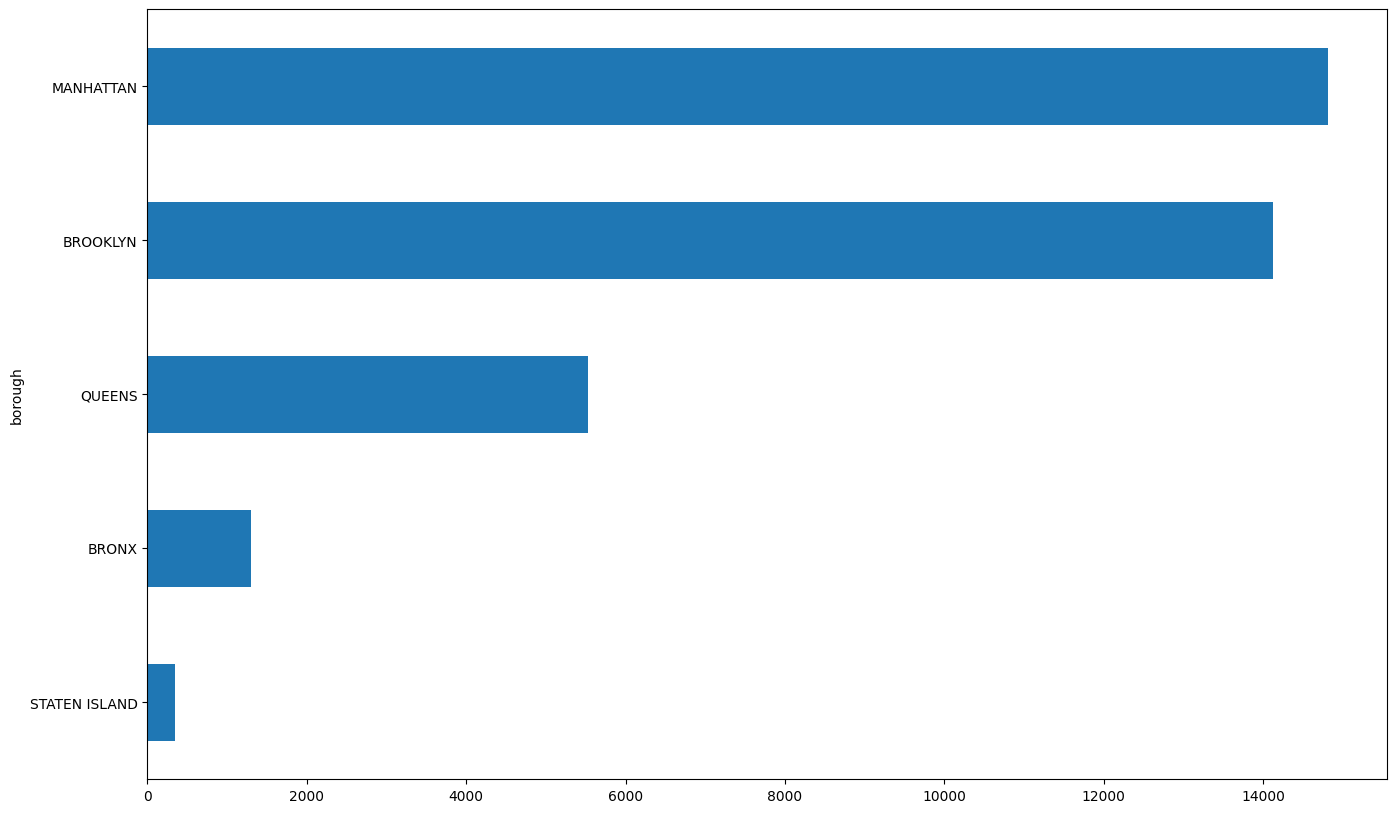

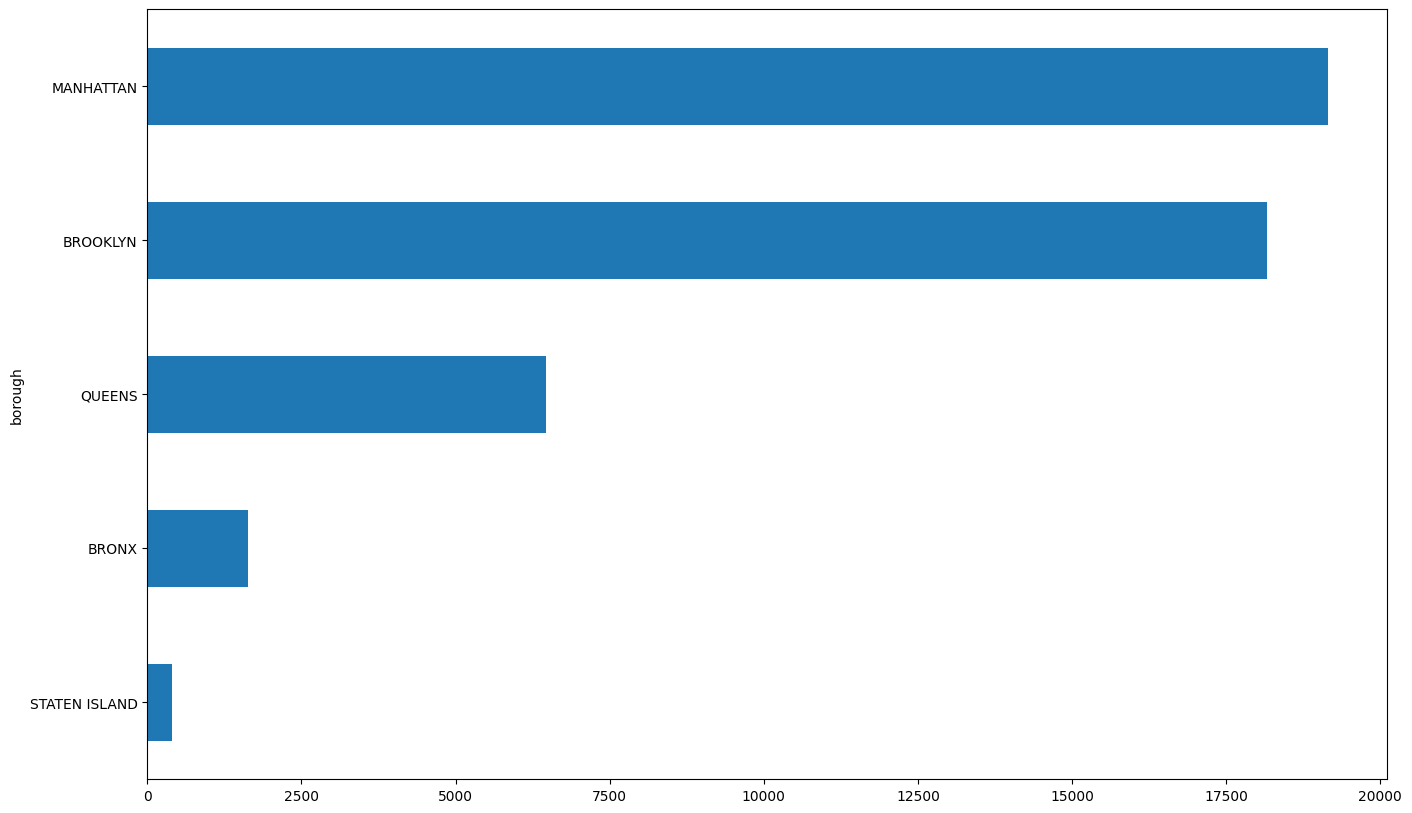

In [234]:
x = len(years)
for i in range(0,x):
    plt.figure(figsize =(16,10))
    abnb_df[abnb_df['year'] == years[i]].groupby(['borough'])['id'].count().sort_values().plot.barh()
    plt.show()

In [235]:
def get_groupby_count(df, groupby_cols, value):
    data = df.groupby(groupby_cols)[value].count().to_frame().reset_index()
    data = data.rename(columns={value:'count'})
    data["year"] = data["year"].apply(lambda x: x.year)
    return data

In [236]:
# Create comparison chart for all boros and NYC based on `value` column
def boro_comparison_line(df, value):
    boro_data = get_groupby_count(df, ['year', 'borough'], value)   
    nyc_data = get_groupby_count(df, ['year'], value)
    nyc_data["borough"] = "NYC"
    
    data = pd.concat([boro_data, nyc_data])

    chart = sns.lineplot(x="year", y="count", hue="borough", data=data)
    chart.axes.set_title("Airbnb count for each borough and NYC".format(value))

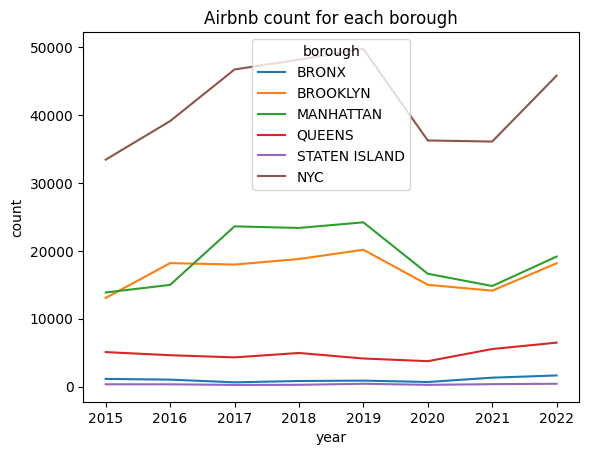

In [246]:
boro_comparison_line(abnb_df,'id')

In [238]:
# Generate zipcode count
def create_boro_count_chart(df, count_col):
    return get_groupby_count(df, [count_col, "borough", "year"], "id").reset_index(drop=True)

In [374]:
zip_boro_count = create_boro_count_chart(abnb_df, "zipcode")
zip_boro_count.head()

,zipcode,borough,year,count
0,10001,MANHATTAN,2015,350
1,10001,MANHATTAN,2016,666
2,10001,MANHATTAN,2017,418
3,10001,MANHATTAN,2018,491
4,10001,MANHATTAN,2019,275


In [273]:
# HELPER FUNCTION
def map_boro_color(boro):
    boro_color_mapper = {"BRONX": "red", "BROOKLYN": "brown", "MANHATTAN": "blue", "QUEENS": "purple", "STATEN ISLAND": "grey"}
    return boro_color_mapper[boro]

In [413]:
def map_boro_count(data, boro, year):
    data = data[data["borough"]== boro]
    data = data[data["year"] == year]
    
    color = map_boro_color(boro) 
    order = data.sort_values(by='count').zipcode
    
    rcParams['figure.figsize'] = 11.7,8.27
    chart = sns.barplot(data=data, y="count", x="zipcode", color=color, order=order)
    chart.axes.tick_params(axis='x', rotation=90)
    chart.set_title("{} zipcode count for year {}".format(boro, year))
    return data


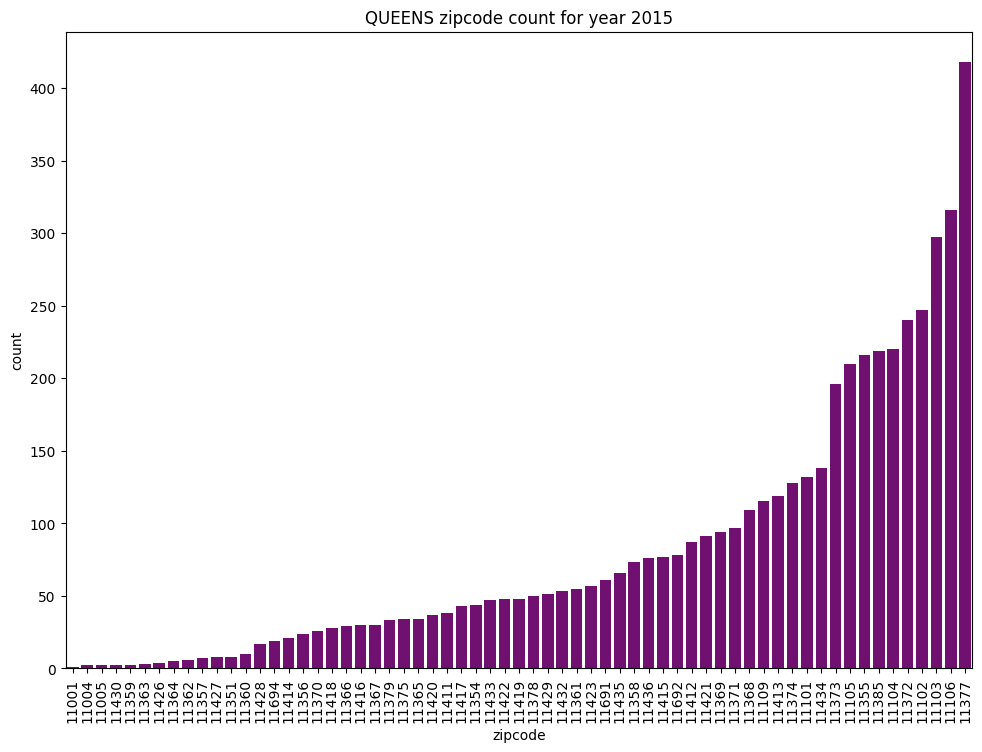

In [414]:
q = map_boro_count(zip_boro_count, "QUEENS", 2015)